In [7]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from label_ranking import *
from massart import *
from lr_regressors import DecisionTreeScore, RandomForestScore


d = 10  # data dimension
k = 5  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W_opt = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=20000)

R_train = ground_truth_permutations(X_train, W_opt)
P_train = np.argsort(R_train, axis=1)

# Test data
X_test = D.rvs(size=10000)

R_test = ground_truth_permutations(X_test, W_opt)
P_test = np.argsort(R_test, axis=1)

In [8]:
dtr_scores = {}
rfr_scores = {}

In [9]:
def RegressorScores(eta_max):
  R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  print("Maximum probability that a pair is in the wrong order in train set permutations:", eta_max)
  print()
  
  avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
  error_DTR = 1 - avg_KTdist_DTR
  print("Decision tree regressor average accuracy:", error_DTR)
  
  avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
  error_RFR = 1 - avg_KTdist_RFR
  print("Random forest regressor average accuracy:", error_RFR)

  return error_DTR, error_RFR

In [16]:
eta_max = 0.1

error_DTR, error_RFR = RegressorScores(eta_max)
dtr_scores[eta_max] = error_DTR
rfr_scores[eta_max] = error_RFR

Maximum probability that a pair is in the wrong order in train set permutations: 0.1

Decision tree regressor average accuracy: 0.76244
Random forest regressor average accuracy: 0.92663


In [11]:
eta_max = 0.2

error_DTR, error_RFR = RegressorScores(eta_max)
dtr_scores[eta_max] = error_DTR
rfr_scores[eta_max] = error_RFR

Maximum probability that a pair is in the wrong order in train set permutations: 0.2

Decision tree regressor average accuracy: 0.69171
Random forest regressor average accuracy: 0.9104


In [12]:
eta_max = 0.3

error_DTR, error_RFR = RegressorScores(eta_max)
dtr_scores[eta_max] = error_DTR
rfr_scores[eta_max] = error_RFR

Maximum probability that a pair is in the wrong order in train set permutations: 0.3

Decision tree regressor average accuracy: 0.62765
Random forest regressor average accuracy: 0.86982


In [17]:
eta_max = 0.4

error_DTR, error_RFR = RegressorScores(eta_max)
dtr_scores[eta_max] = error_DTR
rfr_scores[eta_max] = error_RFR

Maximum probability that a pair is in the wrong order in train set permutations: 0.4

Decision tree regressor average accuracy: 0.56225
Random forest regressor average accuracy: 0.77195


In [18]:
eta_max = 0.499

error_DTR, error_RFR = RegressorScores(eta_max)
dtr_scores[eta_max] = error_DTR
rfr_scores[eta_max] = error_RFR

Maximum probability that a pair is in the wrong order in train set permutations: 0.499

Decision tree regressor average accuracy: 0.50137
Random forest regressor average accuracy: 0.52163


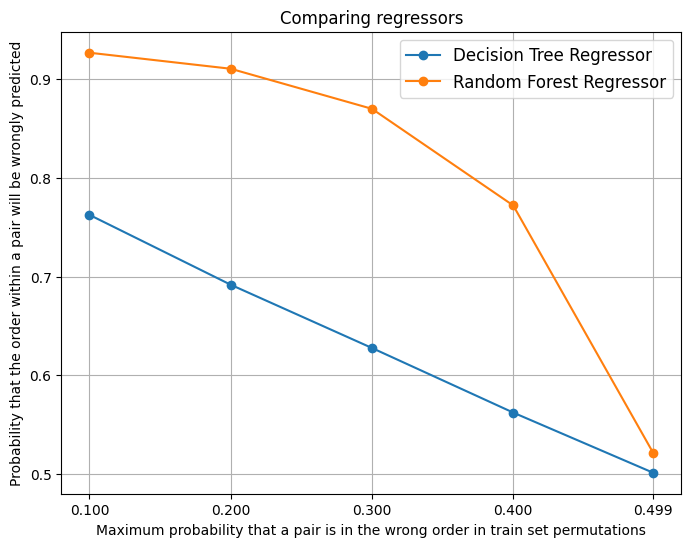

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Comparing regressors')
plt.plot(list(dtr_scores.keys()), list(dtr_scores.values()), '-o')
plt.plot(list(rfr_scores.keys()), list(rfr_scores.values()), '-o')
plt.legend(['Decision Tree Regressor', 'Random Forest Regressor'], fontsize=12)
plt.xticks(list(dtr_scores.keys()))
plt.xlabel('Maximum probability that a pair is in the wrong order in train set permutations')
plt.ylabel('Probability that the order within a pair will be wrongly predicted')
plt.grid()
plt.show()